#RDD DataFrame 

In [1]:
global Path
if sc.master[0:5]=='local':
    Path='file:/home/neo/pythonwork/pythonproject/data/'

In [2]:
data=sc.textFile(Path+'u.user')
data.count()

943

In [3]:
data.take(5)
type(data.take(5))

list

In [4]:
datauser=data.map(lambda x:x.split('|'))
datauser.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [5]:
type(datauser)

pyspark.rdd.PipelinedRDD

In [6]:
sqlContext=SparkSession.builder.getOrCreate()

In [7]:
from pyspark.sql import Row
user_row=datauser.map(lambda x: Row(
    userid=x[0],
    age=int(x[1]),
    gender=x[2],
    occupation=x[3],
    zipcode=(x[4])))

In [8]:
type(user_row)
user_row.take(5)

[Row(age=24, gender='M', occupation='technician', userid='1', zipcode='85711'),
 Row(age=53, gender='F', occupation='other', userid='2', zipcode='94043'),
 Row(age=23, gender='M', occupation='writer', userid='3', zipcode='32067'),
 Row(age=24, gender='M', occupation='technician', userid='4', zipcode='43537'),
 Row(age=33, gender='F', occupation='other', userid='5', zipcode='15213')]

In [9]:
user_df=sqlContext.createDataFrame(user_row)

In [10]:
type(user_df)

pyspark.sql.dataframe.DataFrame

In [11]:
user_df.columns

['age', 'gender', 'occupation', 'userid', 'zipcode']

In [12]:
#user_df.describle()
#user_df.info()
#user_df.shape()
user_df.head()

Row(age=24, gender='M', occupation='technician', userid='1', zipcode='85711')

In [13]:
user_df['age']

Column<b'age'>

In [14]:
user_df.show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [15]:
user_df.alias('df')

DataFrame[age: bigint, gender: string, occupation: string, userid: string, zipcode: string]

In [15]:
df=user_df

In [16]:
df.show(1)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
+---+------+----------+------+-------+
only showing top 1 row



In [17]:
user_df.registerTempTable("user_table")

In [30]:
aaa=sqlContext.sql('select count(1) from user_table').collect()
type(aaa[0])


pyspark.sql.types.Row

In [19]:
sqlContext.sql('select * from user_table').show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

# show some fields 

show the rdd fields

In [31]:
datauser.map(lambda x:[x[0],x[1],x[2],x[3],x[4]])

PythonRDD[87] at RDD at PythonRDD.scala:49

In [32]:
datauser.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

#show dataframe field

In [23]:
user_df.select('userid','age').show(5)

+------+---+
|userid|age|
+------+---+
|     1| 24|
|     2| 53|
|     3| 23|
|     4| 24|
|     5| 33|
+------+---+
only showing top 5 rows



In [24]:
df.select(df.userid).show(5)

+------+
|userid|
+------+
|     1|
|     2|
|     3|
|     4|
|     5|
+------+
only showing top 5 rows



In [33]:
df[df['userid'],df['age']].show(5)

+------+---+
|userid|age|
+------+---+
|     1| 24|
|     2| 53|
|     3| 23|
|     4| 24|
|     5| 33|
+------+---+
only showing top 5 rows



In [34]:
df[['userid','age']].show(5)

+------+---+
|userid|age|
+------+---+
|     1| 24|
|     2| 53|
|     3| 23|
|     4| 24|
|     5| 33|
+------+---+
only showing top 5 rows



#spark sql show some fields

In [35]:
sqlContext.sql('select userid,age from user_table').show(5)

+------+---+
|userid|age|
+------+---+
|     1| 24|
|     2| 53|
|     3| 23|
|     4| 24|
|     5| 33|
+------+---+
only showing top 5 rows



# add some fields

#RDD

In [36]:
datauser.map(lambda x:[x[0],x[1],2017-int(x[1])]).take(5)

[['1', '24', 1993],
 ['2', '53', 1964],
 ['3', '23', 1994],
 ['4', '24', 1993],
 ['5', '33', 1984]]

#use dataframe add some fields

In [38]:
datauser.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [53]:
df.select('userid','age',(2017-df.age).alias('ss')).show(5)

+------+---+----+
|userid|age|  ss|
+------+---+----+
|     1| 24|1993|
|     2| 53|1964|
|     3| 23|1994|
|     4| 24|1993|
|     5| 33|1984|
+------+---+----+
only showing top 5 rows



In [54]:
df[['userid','age',(2017-df['age']).alias('as')]].show(5)

+------+---+----+
|userid|age|  as|
+------+---+----+
|     1| 24|1993|
|     2| 53|1964|
|     3| 23|1994|
|     4| 24|1993|
|     5| 33|1984|
+------+---+----+
only showing top 5 rows



In [63]:
from pyspark.sql.functions import col
df[['userid','age',(2017-col('age')).alias('ddd')]].show(5)

+------+---+----+
|userid|age| ddd|
+------+---+----+
|     1| 24|1993|
|     2| 53|1964|
|     3| 23|1994|
|     4| 24|1993|
|     5| 33|1984|
+------+---+----+
only showing top 5 rows



In [29]:
df.select('userid','age',(2017-df.age).alias('birth')).show(5)

+------+---+-----+
|userid|age|birth|
+------+---+-----+
|     1| 24| 1993|
|     2| 53| 1964|
|     3| 23| 1994|
|     4| 24| 1993|
|     5| 33| 1984|
+------+---+-----+
only showing top 5 rows



#sql add some fields

In [64]:
sqlContext.sql('select userid,age,2017-age birth from user_table').show(5)

+------+---+-----+
|userid|age|birth|
+------+---+-----+
|     1| 24| 1993|
|     2| 53| 1964|
|     3| 23| 1994|
|     4| 24| 1993|
|     5| 33| 1984|
+------+---+-----+
only showing top 5 rows



# filter data 

#use RDD filter data

In [65]:
datauser.filter(lambda x:(x[1]=='30' and x[2]=='M')).take(5)

[['17', '30', 'M', 'programmer', '06355'],
 ['42', '30', 'M', 'administrator', '17870'],
 ['77', '30', 'M', 'technician', '29379'],
 ['112', '30', 'M', 'salesman', '60613'],
 ['125', '30', 'M', 'lawyer', '22202']]

#user dataframe data

In [66]:
df.select(df['userid']=='5',).show(5)

+------------+
|(userid = 5)|
+------------+
|       false|
|       false|
|       false|
|       false|
|        true|
+------------+
only showing top 5 rows



In [69]:
df.filter((df['gender']=='M')& (df['age']==30)).show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 30|     M|   programmer|    17|  06355|
| 30|     M|administrator|    42|  17870|
| 30|     M|   technician|    77|  29379|
| 30|     M|     salesman|   112|  60613|
| 30|     M|       lawyer|   125|  22202|
+---+------+-------------+------+-------+
only showing top 5 rows



In [70]:
df[(df['gender']=="M") & (df['age']=='30')].show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 30|     M|   programmer|    17|  06355|
| 30|     M|administrator|    42|  17870|
| 30|     M|   technician|    77|  29379|
| 30|     M|     salesman|   112|  60613|
| 30|     M|       lawyer|   125|  22202|
+---+------+-------------+------+-------+
only showing top 5 rows



In [73]:
df[(df['gender']=="M") | (df['age']=='30')].show(7)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
+---+------+-------------+------+-------+
only showing top 7 rows



In [78]:
df['zipcode',][(df['gender']=="M") &
               (df['age']=='30')].show(7)

+-------+
|zipcode|
+-------+
|  06355|
|  17870|
|  29379|
|  60613|
|  22202|
|  95938|
|  17604|
+-------+
only showing top 7 rows



#use sql filter data

In [36]:
sqlContext.sql('''select userid,age from user_table where age>30 
and gender="M"''').show(5)

+------+---+
|userid|age|
+------+---+
|     6| 42|
|     7| 57|
|     8| 36|
|    10| 53|
|    13| 47|
+------+---+
only showing top 5 rows



# sorted

use rDD for sorted

In [37]:
datauser.takeOrdered(5,key=lambda x:-1*int(x[1]))

[['481', '73', 'M', 'retired', '37771'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['860', '70', 'F', 'retired', '48322'],
 ['559', '69', 'M', 'executive', '10022']]

#use dataframe for sorted

In [38]:
df[df['age'],df['userid']].orderBy('age').show(5)

+---+------+
|age|userid|
+---+------+
|  7|    30|
| 10|   471|
| 11|   289|
| 13|   142|
| 13|   609|
+---+------+
only showing top 5 rows



In [39]:
df[df['age'],df['userid']].orderBy('age',ascending=False).show(5)

+---+------+
|age|userid|
+---+------+
| 73|   481|
| 70|   767|
| 70|   860|
| 70|   803|
| 69|   559|
+---+------+
only showing top 5 rows



RDD:sort by multiple fields

In [40]:
datauser.takeOrdered(5,lambda x:(x[0],x[1]))

[['1', '24', 'M', 'technician', '85711'],
 ['10', '53', 'M', 'lawyer', '90703'],
 ['100', '36', 'M', 'executive', '90254'],
 ['101', '15', 'M', 'student', '05146'],
 ['102', '38', 'M', 'programmer', '30220']]

dataframe: sort by multiple fields

In [41]:
df.orderBy([df['age'],df['gender']],ascending=[True,False]).show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
|  7|     M|   student|    30|  55436|
| 10|     M|   student|   471|  77459|
| 11|     M|      none|   289|  94619|
| 13|     M|     other|   142|  48118|
| 13|     M|      none|   628|  94306|
+---+------+----------+------+-------+
only showing top 5 rows



#display data that is duplicated

In [42]:
datauser.map(lambda x:x[2]).distinct().take(5)

['M', 'F']

# group statistics

rdd group statistics

In [43]:
datauser.map(lambda x:((x[2],x[3]),1)).reduceByKey(lambda x,y:x+y).take(5)

[(('M', 'educator'), 69),
 (('F', 'educator'), 26),
 (('F', 'student'), 60),
 (('M', 'technician'), 26),
 (('F', 'engineer'), 2)]

# join

In [86]:
rawdatawithheader=sc.textFile('file:/home/neo/pythonwork/pythonproject/data/free-zipcode-database-Primary.csv')
header=rawdatawithheader.first()
rawdata=rawdatawithheader.filter(lambda x:x!=header)
rawdata.take(5)

['"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,',
 '"00610","STANDARD","ANASCO","PR","PRIMARY",18.28,-67.14,"NA-US-PR-ANASCO","false",,,',
 '"00611","PO BOX","ANGELES","PR","PRIMARY",18.28,-66.79,"NA-US-PR-ANGELES","false",,,',
 '"00612","STANDARD","ARECIBO","PR","PRIMARY",18.45,-66.73,"NA-US-PR-ARECIBO","false",,,',
 '"00601","STANDARD","ADJUNTAS","PR","PRIMARY",18.16,-66.72,"NA-US-PR-ADJUNTAS","false",,,']

In [87]:
rawdata=rawdata.map(lambda x:x.replace('"',''))
rawdata.take(5)

['00705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,false,,,',
 '00610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,false,,,',
 '00611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,false,,,',
 '00612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,false,,,',
 '00601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,false,,,']

In [88]:
zipdata=rawdata.map(lambda x:x.split(','))
zipdata.take(2)

[['00705',
  'STANDARD',
  'AIBONITO',
  'PR',
  'PRIMARY',
  '18.14',
  '-66.26',
  'NA-US-PR-AIBONITO',
  'false',
  '',
  '',
  ''],
 ['00610',
  'STANDARD',
  'ANASCO',
  'PR',
  'PRIMARY',
  '18.28',
  '-67.14',
  'NA-US-PR-ANASCO',
  'false',
  '',
  '',
  '']]

In [89]:
from pyspark.sql import Row
zipdata=zipdata.map(lambda x:Row(zipcode=x[0],zipcodetype=x[1],city=x[2],state=x[3]))
zipdata.take(5)

[Row(city='AIBONITO', state='PR', zipcode='00705', zipcodetype='STANDARD'),
 Row(city='ANASCO', state='PR', zipcode='00610', zipcodetype='STANDARD'),
 Row(city='ANGELES', state='PR', zipcode='00611', zipcodetype='PO BOX'),
 Row(city='ARECIBO', state='PR', zipcode='00612', zipcodetype='STANDARD'),
 Row(city='ADJUNTAS', state='PR', zipcode='00601', zipcodetype='STANDARD')]

In [91]:
type(zipdata_1)

NameError: name 'zipdata_1' is not defined

In [92]:
zipdata_df=sqlContext.createDataFrame(zipdata)
zipdata_df.columns

['city', 'state', 'zipcode', 'zipcodetype']

In [93]:
zipdata_df.registerTempTable('zipdata_table')

In [94]:
df.first()

Row(age=24, gender='M', occupation='technician', userid='1', zipcode='85711')

In [95]:
zipdata_df.first()

Row(city='AIBONITO', state='PR', zipcode='00705', zipcodetype='STANDARD')

In [96]:
join_df=df.join(zipdata_df,zipdata_df['zipcode']==df['zipcode'],'left_outer')
join_df.columns

['age',
 'gender',
 'occupation',
 'userid',
 'zipcode',
 'city',
 'state',
 'zipcode',
 'zipcodetype']

In [97]:
join_df.show(1)


+---+------+----------+------+-------+-------------+-----+-------+-----------+
|age|gender|occupation|userid|zipcode|         city|state|zipcode|zipcodetype|
+---+------+----------+------+-------+-------------+-----+-------+-----------+
| 53|     F|     other|     2|  94043|MOUNTAIN VIEW|   CA|  94043|   STANDARD|
+---+------+----------+------+-------+-------------+-----+-------+-----------+
only showing top 1 row



In [98]:
join_df[join_df['state']=='NY'].show(2)

+---+------+-------------+------+-------+-------------+-----+-------+-----------+
|age|gender|   occupation|userid|zipcode|         city|state|zipcode|zipcodetype|
+---+------+-------------+------+-------+-------------+-----+-------+-----------+
| 21|     M|entertainment|    16|  10309|STATEN ISLAND|   NY|  10309|   STANDARD|
| 25|     M|    executive|   862|  13820|      ONEONTA|   NY|  13820|   STANDARD|
+---+------+-------------+------+-------+-------------+-----+-------+-----------+
only showing top 2 rows



In [99]:
groupbystate=join_df.groupBy(join_df['state']).count().orderBy('count')

In [100]:
type(groupbystate)

pyspark.sql.dataframe.DataFrame

In [105]:
aaa=groupbystate.toPandas().set_index('state')
aaa[0:5]

,count
state,
WY,1
AE,1
SD,1
AR,1
AP,1


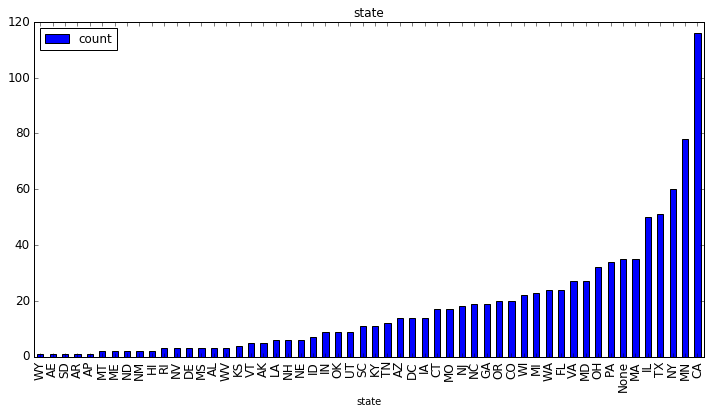

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
aaa.plot(kind='bar',title='state',figsize=(12,6),legend=True,fontsize=12)
plt.show()

In [101]:
job_statistics=join_df.groupBy('occupation').count().orderBy('count',ascending=0)

In [103]:
bbb=job_statistics.toPandas().set_index('occupation')

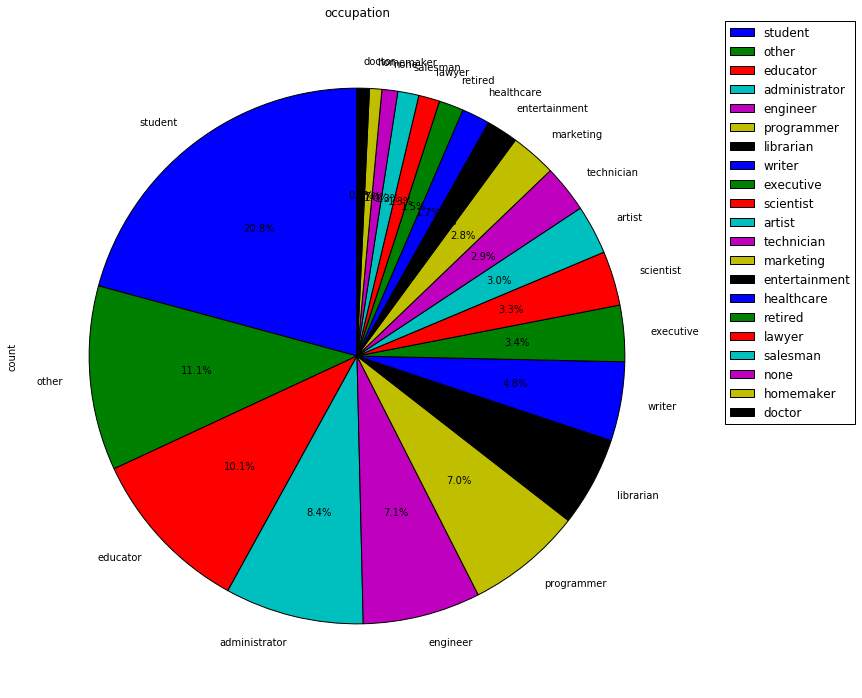

In [114]:
ax =bbb['count'].plot(kind='pie',
           title ="occupation",figsize=(12,12),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

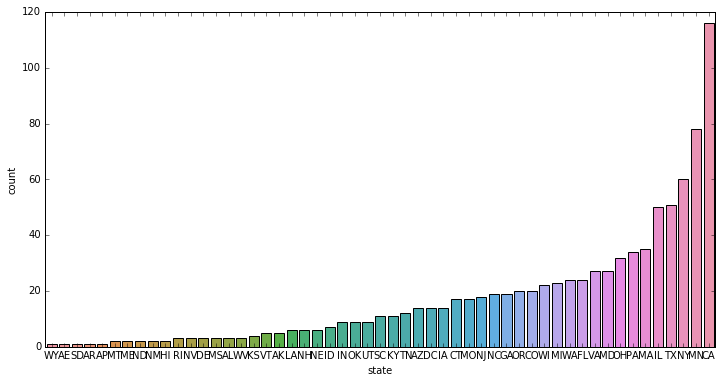

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig=plt.figure()
fig.set_size_inches(12,6)
sns.barplot(x=aaa.index,y=aaa['count'])
plt.show()

In [126]:
from pyecharts import Bar
import random

bar = Bar("我的第一个图表", "这里是副标题")
bar.add('aaa', aaa.index[10:20], aaa['count'][10:20], mark_point=["min"],mark_line=["average"])
bar.add("bbb", aaa.index[10:20], aaa['count'][10:20]+random.randint(1,6) ,mark_point=["max"])

#bar.show_config()
#bar.render()